## 2,1 plots

. rugplot() 은 단독으로 사용하기 어렵습니다.

. 다른 세 plot을 하나의 figure에 담아보겠습니다.

      . plt.subplots()명령으로 figure 와 axes를 지정합니다.
      . seaborn plot함수에 ax= 인자를 삽입하여 그려질 axes를 지정합니다.

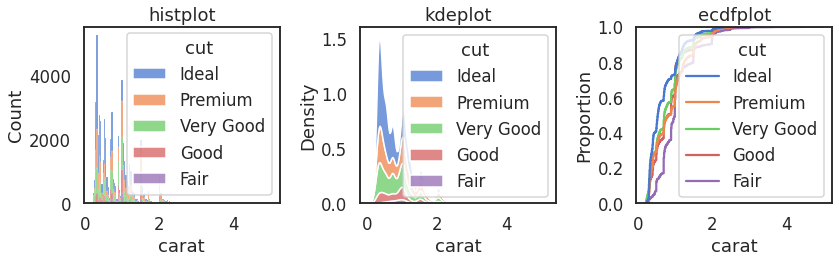

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")
diamonds.head()

# plot
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.histplot(data=diamonds, x="carat", hue="cut", multiple="stack", ax=axes[0], legend=True)
sns.kdeplot(data=diamonds, x="carat", hue="cut", multiple="stack", ax=axes[1], legend=True)
sns.ecdfplot(data=diamonds, x="carat", hue="cut", ax=axes[2], legend=True)

axes[0].set_title("histplot")
axes[1].set_title("kdeplot")
axes[2].set_title("ecdfplot")

fig.tight_layout()

## 2.2 proportion

. 별도의 설정을 하지 않았는데도 y축 label이 그래프마다 다릅니다.
     
     . histplot() 은 count
     . kdeplot() 은 density
     . ecdfplot() 은 proportion으로 되어 있습니다.
     . ecdfplot() 의 뜻은 empircal cumulative distribution functions 입니다.

. 위 코드에서 multiple 부분을 "fill" 로 변경하면 비율을 그립니다.

. 단위가 바뀌어지만 y축 label은 변하지 않았습니다. 주의해야 합니다.

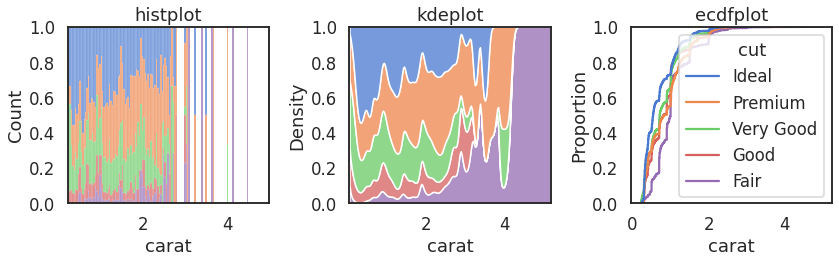

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.histplot(data=diamonds, x="carat", hue="cut", multiple="fill", ax=axes[0], legend=False)
sns.kdeplot(data=diamonds, x="carat", hue="cut", multiple="fill", ax=axes[1], legend=False)
sns.ecdfplot(data=diamonds, x="carat", hue="cut", ax=axes[2], legend=True)

axes[0].set_title("histplot")
axes[1].set_title("kdeplot")
axes[2].set_title("ecdfplot")

fig.tight_layout()

## 2.3 bivariate distribution

. x와 y축에 다른 변수를 지정하면 2변수 분포도를 그릴 수 있습니다.

. ecdfplot() 에는  적용되지 않습니다.

. 범주형(categorical) 변수에는 적용되지 않으니 주의합니다.

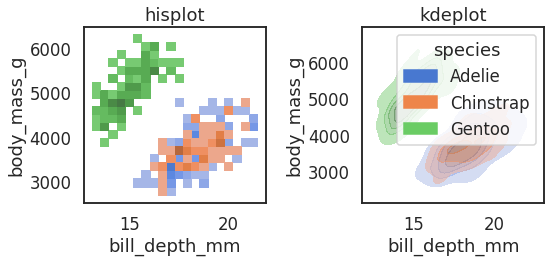

In [ ]:
# Loda the penguins dataset
penguins = sns.load_dataset("penguins")
penguins.head()

fig, axes = plt.subplots(ncols=2, figsize=(8,4))
sns.histplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="species", 
             bins=20, ax=axes[0], legend=False)
sns.kdeplot(data=penguins, x="bill_depth_mm", y="body_mass_g", hue="species", 
            fill=True, levels=5, alpha=0.5,
            ax=axes[1], legend=True)

axes[0].set_title("hisplot")
axes[1].set_title("kdeplot")

fig.tight_layout()

## 3.displot() vs kdeplot()

.diamond 데이터셋을 displot()과 kdeplot()으로 그려 비교해 보겠습니다.

.displot()은 FacetGrid를 생성합니다.

     .matplotlib이 생성하는 figure 와 axes 를 포함하는 객체입니다.
    
     .따라서 matplot이 subplot으로 생성하는 Axes에 담길 수 없습니다.

.displot()은 matplotlib의 pyplot방식으로 사용해야 합니다.

.그림 크기는 height와 aspect로 제어합니다

AttributeError: ignored

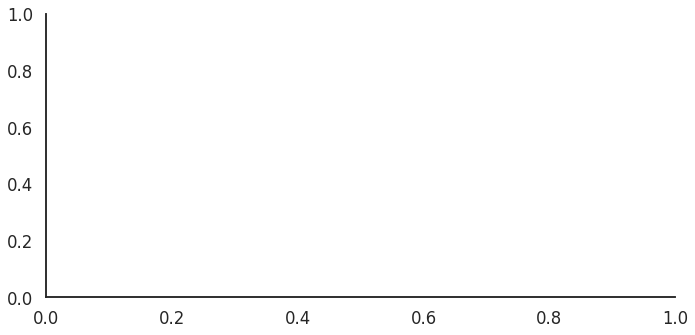

In [ ]:
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kinda="kde",
   multiple="fill", clip=(0, None),
    palette= "ch:rot= -.25,hue=1,light=.75",
    height=5, aspect=2
)

. 반면 kdeplot() 은 axes 를 생성합니다.
. ax 인자를 사용해 subplot으로 미리 생성한 axes에 담을 수 있습니다.

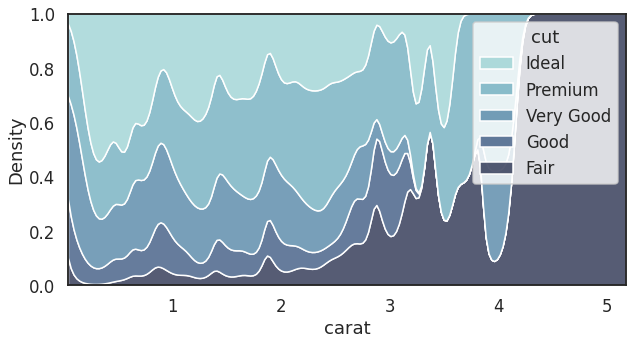

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=diamonds,
    x="carat", hue="cut",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
    ax=ax
)

. 두 그림의 lenggent가 묘하게 다릅니다.
     . displot() 은 옆으로 밀려있고,
     . kdeplot() 은 axes 안에 담겨 있습니다.

. 그런데 문제가 있습니다.
      . legend를 옮기려면 axes.legentd() 로 제어해야 합니다.
      . 그리고 legend(handles, labels)형태로 데이터를 넣어야 하는데, 
      . handles와 labels를 추출하는 axes.get_handles_labels()가 작동하지 않습니다.

 . hadndles, labels를 출력시켜도 모두[] 로만 나옵니다.

 .legend는 텅 비어 있습니다.     

handles=[]
lables=[]



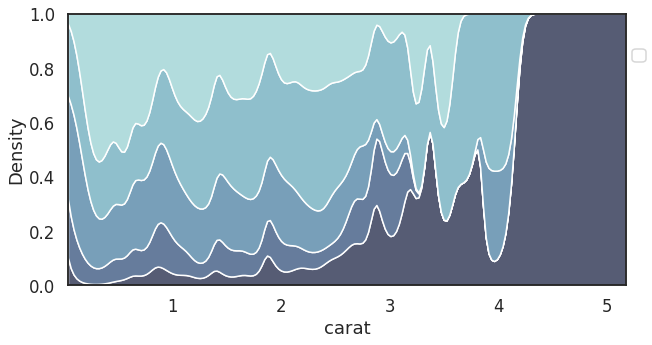

In [ ]:
# object oriented interface
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=diamonds,
    x="carat", hue="cut",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
#     height=5, aspect=2
    ax=ax
)
h, l = ax.get_legend_handles_labels()
print(f"handles={h}\nlables={l}\n")
ax.legend(h, l, bbox_to_anchor=(1.05,0.9))

. 강제로 label를 인기하면 legend를 제어할수 있습니다.

. 그러나 순서가 반대이고, 반대로 넣으면 언제나 색상과 맞는지 확신이 없습니다.

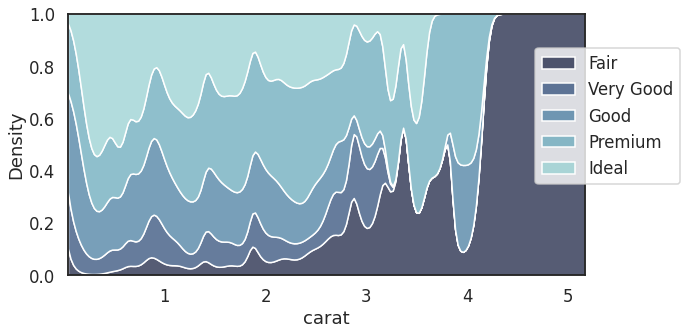

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(
    data=diamonds,
    x="carat", hue="cut",
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
#     height=5, aspect=2
    ax=ax
)
ax.legend(diamonds["cut"].unique()[::-1], bbox_to_anchor=(1.2,0.9))
fig.tight_layout()

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")

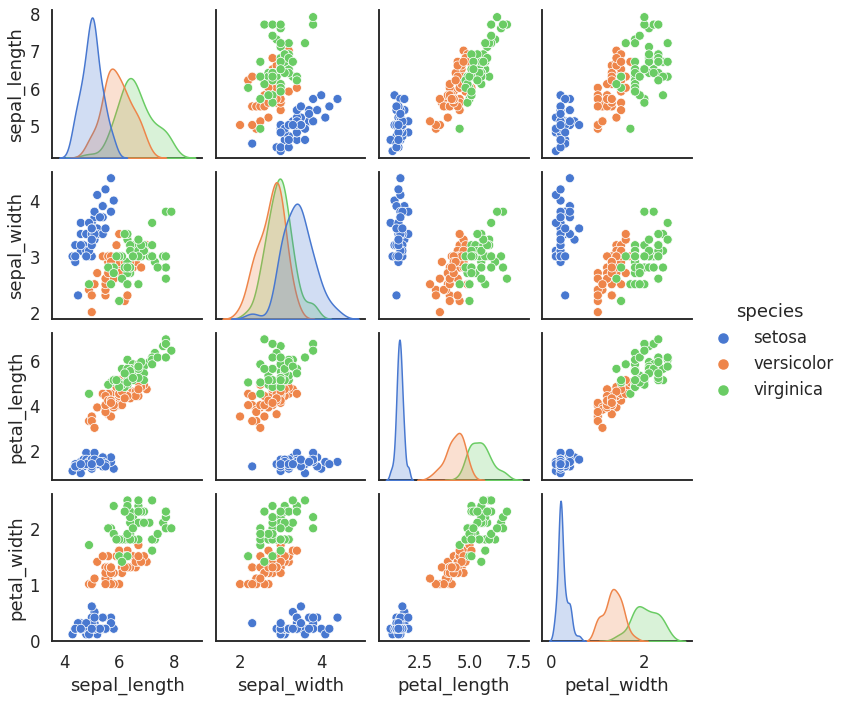

In [ ]:
g = sns.pairplot(iris, hue= "species")

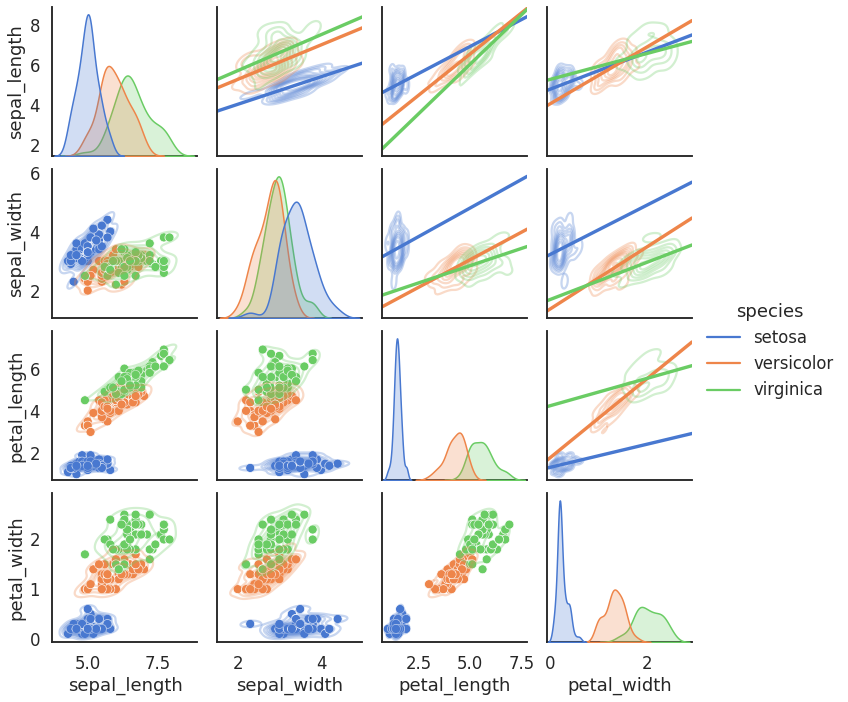

In [ ]:
g = sns.pairplot(iris, hue="species", kind="kde", plot_kws={"alpha":0.3})
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)

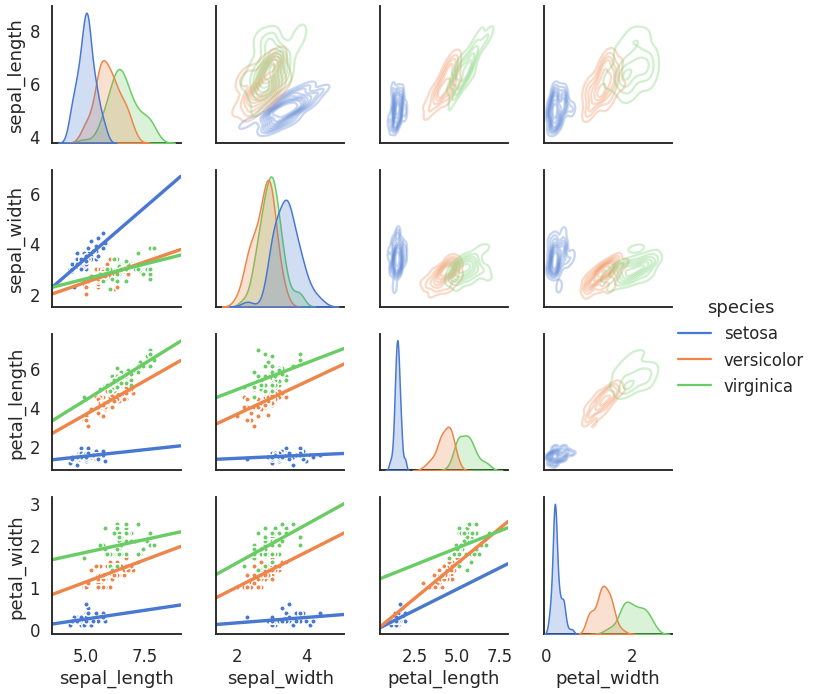

In [ ]:
# 틀 만들기
g = sns.PairGrid(iris, hue="species", diag_sharey=False)

# diagonal
g.map_diag(sns.kdeplot, fill=True)

# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)

# upper
g.map_upper(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

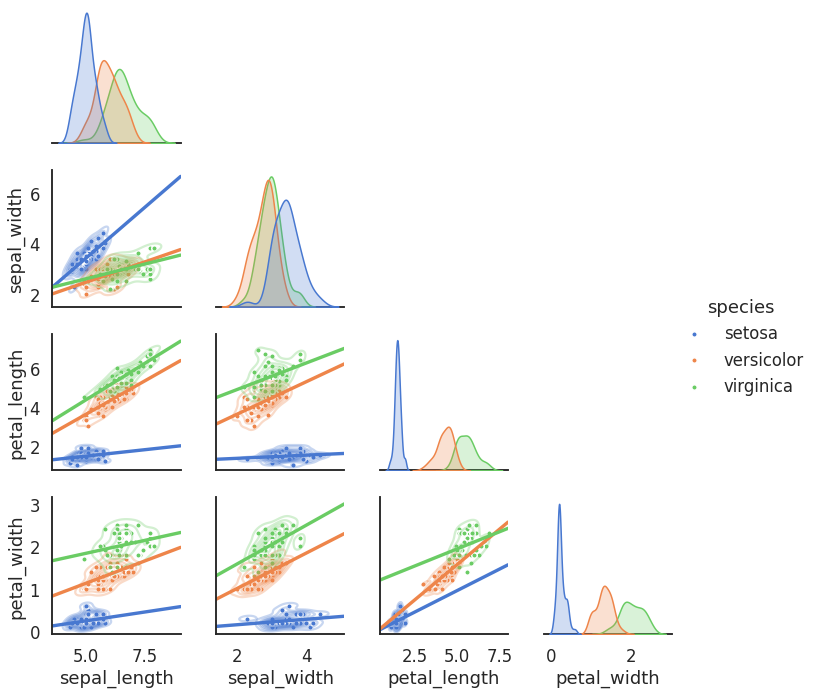

In [ ]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)

# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

In [ ]:
g.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041d51b588>,
        None, None, None],
        None, None],
        None],
      dtype=object)

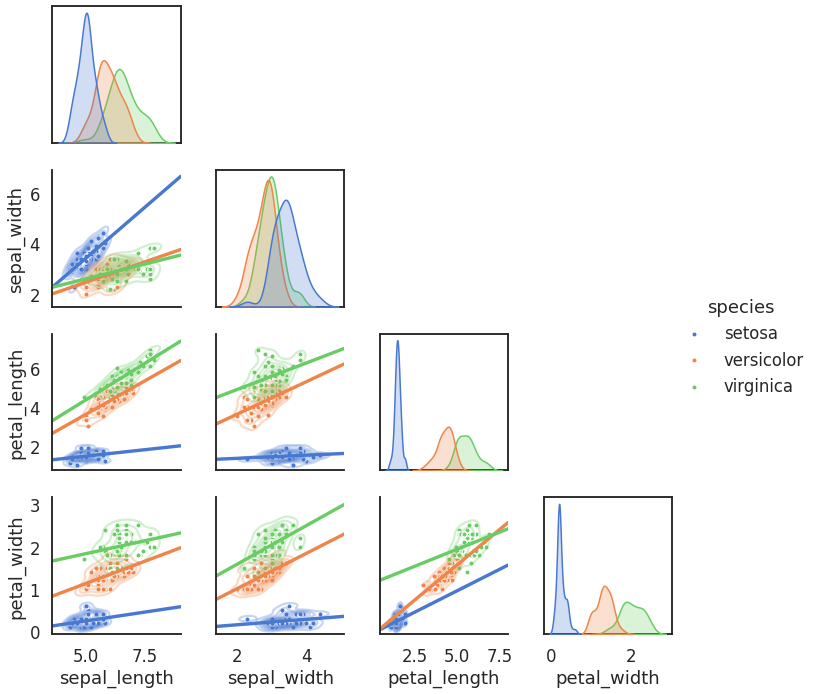

In [ ]:
g = sns.PairGrid(iris, hue="species", diag_sharey=False, corner=True)

# diagonal
g.map_diag(sns.kdeplot, fill=True)
for i in range(4):
    g.axes[i][i].spines["left"].set_visible(True)
    g.axes[i][i].spines["top"].set_visible(True)
    g.axes[i][i].spines["right"].set_visible(True)
    
# lower
g.map_lower(plt.scatter, s=30, edgecolor="w")
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)

# legend
g.add_legend()

In [ ]:
g._legend_data

{'setosa': <matplotlib.collections.PathCollection at 0x7f0416cc37b8>,
 'versicolor': <matplotlib.collections.PathCollection at 0x7f0416cc3ac8>,
 'virginica': <matplotlib.collections.PathCollection at 0x7f0416cc3e10>}

In [ ]:
handles = g._legend_data.values()
labels = g._legend_data.keys()

# axes[1][0] 기준으로 오른쪽 멀리 범례 삽입
g.axes[1][0].legend(handles=handles, labels=labels,
                    bbox_to_anchor=(3.45, 1),
                    fontsize="large", frameon=False
                   )


In [ ]:
type(g.fig)

matplotlib.figure.Figure

In [ ]:
g.fig.align_ylabels(g.axes[:,0])

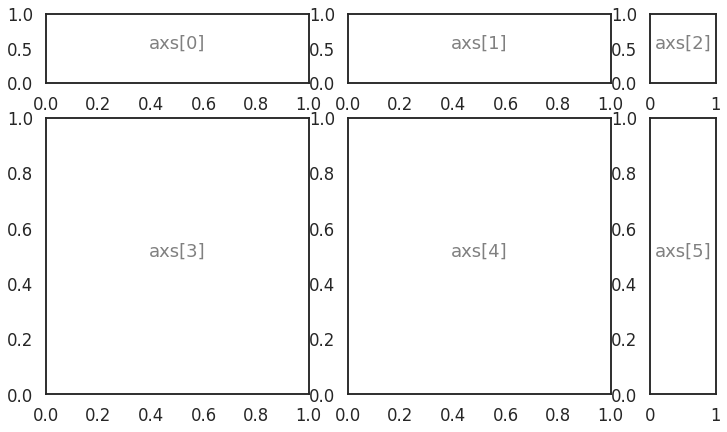

In [ ]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])
    axs[i].text(0.5, 0.5, f"axs[{i}]", fontdict={"horizontalalignment":"center", "color":"gray"})


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


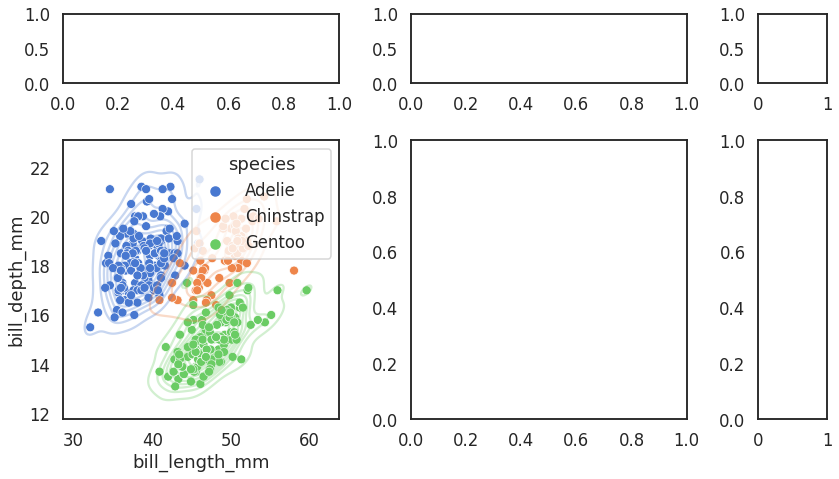

In [ ]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

# 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

# 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

# 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])
# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


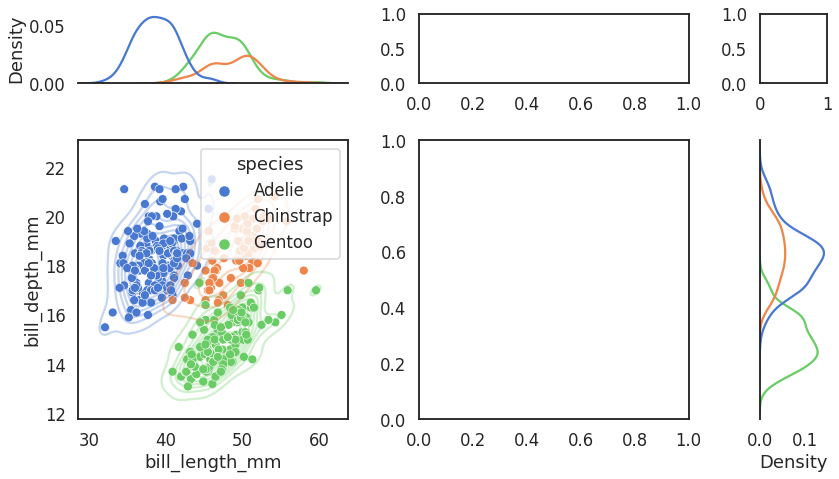

In [ ]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

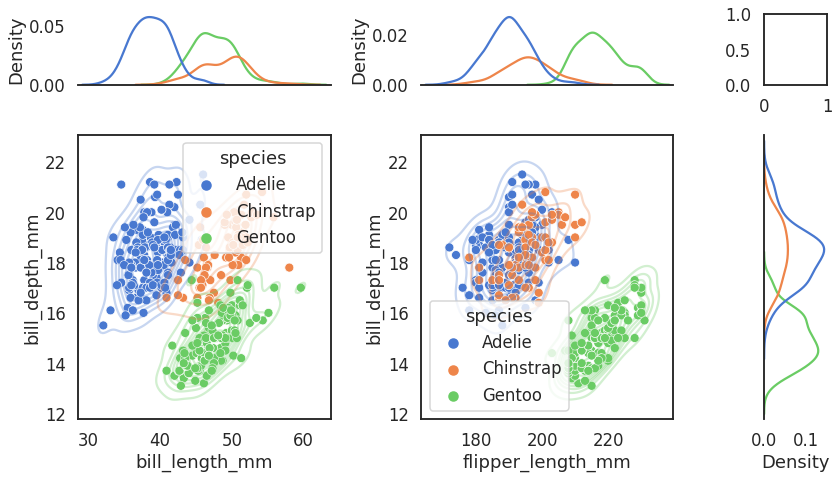

In [ ]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3])

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4])

# 3.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4])

# 3.3. histogram (bill_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

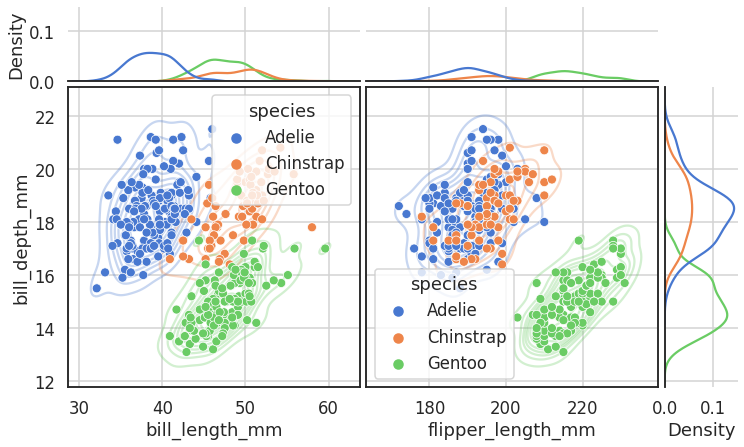

In [ ]:
fig = plt.figure(figsize=(12,7))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seab

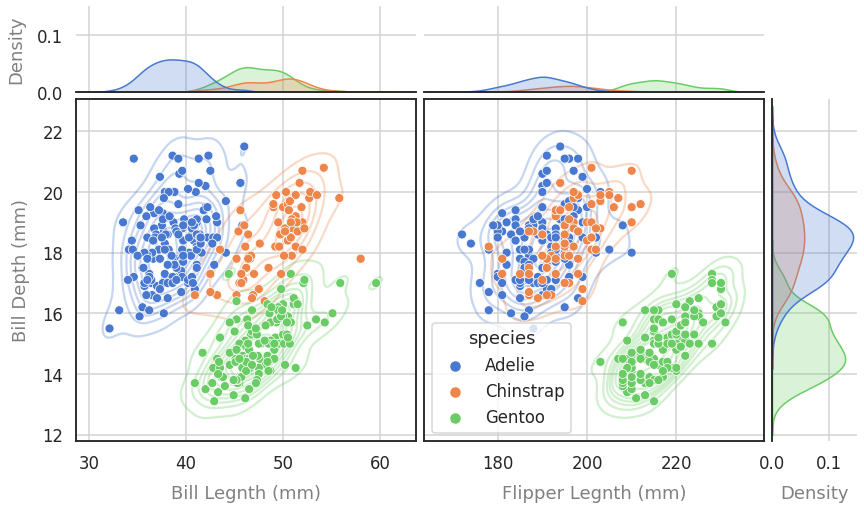

In [ ]:
sns.set_style("white")
sns.set_context("talk")

fig = plt.figure(figsize=(14,8))

widths = [4, 4, 1]
heights = [1, 4]

### 1. gridspec preparation
spec = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights, 
                        wspace=0.03, hspace=0.03)  # setting spaces

### 2. setting axes
axs = {}
for i in range(len(heights)*len(widths)):
    axs[i] = fig.add_subplot(spec[i//len(widths), i%len(widths)])

### 3. bill_length_mm vs bill_depth_mm
# 3.1. kdeplot
sns.kdeplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[3], zorder=1, legend=False)

# 3.2. scatterplot
sns.scatterplot("bill_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[3], zorder=2, legend=False)

# 3.3. histogram (bill_length_mm)
sns.kdeplot("bill_length_mm", data=penguins, hue="species", ax=axs[0], legend=False, zorder=1, fill=True)
axs[0].set_xlim(axs[3].get_xlim())
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
axs[0].spines["left"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[0].spines["right"].set_visible(False)

# 3.3. histogram (bill_depth_mm)
sns.kdeplot(y="bill_depth_mm", data=penguins, hue="species", ax=axs[5], legend=False, zorder=1, fill=True)
axs[5].set_ylim(axs[3].get_ylim())
axs[5].set_ylabel('')
axs[5].set_yticklabels([])
axs[5].spines["bottom"].set_visible(False)
axs[5].spines["top"].set_visible(False)
axs[5].spines["right"].set_visible(False)

### 4. flipper_length_mm vs bill_depth_mm
# 4.1. kdeplot
sns.kdeplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", alpha=0.3, ax=axs[4], zorder=1)

# 4.2. scatterplot
sns.scatterplot("flipper_length_mm", "bill_depth_mm", data=penguins, hue="species", ax=axs[4], zorder=2)

# 4.3. histogram (flipper_length_mm)
sns.kdeplot("flipper_length_mm", data=penguins, hue="species", ax=axs[1], legend=False, zorder=1, fill=True)
axs[1].set_xlim(axs[4].get_xlim())
axs[1].set_xlabel('')
axs[1].set_xticklabels([])
axs[1].spines["left"].set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)

### 5. unnecessary elements removal
# 5.1. upper-right axes
axs[2].axis("off")

# 5.2. margin kdeplot scale unification
hist_range_max = max(axs[0].get_ylim()[-1], axs[1].get_ylim()[-1], axs[5].get_xlim()[-1])
for i in range(len(widths)-1):
    axs[i].set_ylim(0, hist_range_max)
axs[5].set_xlim(0, hist_range_max)

# 5.3. redundent labels and titles removal
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[4].set_yticklabels([])
axs[4].set_ylabel('')

# 5.4. grids
for i in range(len(heights)*len(widths)):
    axs[i].grid("on", color="lightgray", zorder=0)
    
# 5.5. labels
font_label = {"color":"gray"}
axs[3].set_xlabel("Bill Legnth (mm)", fontdict=font_label, labelpad=12)
axs[3].set_ylabel("Bill Depth (mm)", fontdict=font_label, labelpad=12)
axs[4].set_xlabel("Flipper Legnth (mm)", fontdict=font_label, labelpad=12)
axs[0].set_ylabel("Density", fontdict=font_label, labelpad=12)
axs[5].set_xlabel("Density", fontdict=font_label, labelpad=12)


fig.tight_layout()

In [ ]:
%matplotlib inline
# matplotlib.use("TKAgg")    # 그래픽 백엔드로 Tk를 사용하고자 한다면, 이 코드를 사용하시기 바랍니다.

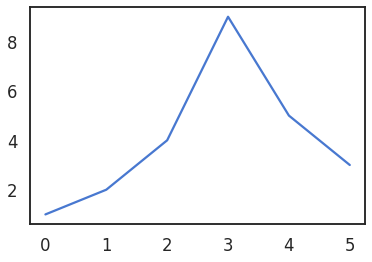

In [ ]:
# pyplot

import matplotlib.pyplot as plt
plt.plot([1,2,4,9,5,3])
plt.show()

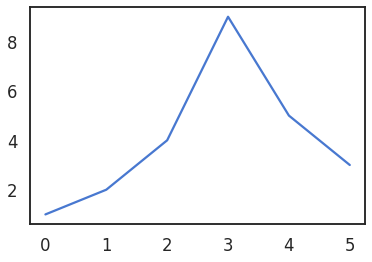

In [ ]:
# 1. 도하지(Figure: fig)를 깔고 그래프를 그릴 구역(Axes: ax)을 정의합니다.
fig,ax = plt.subplots()

# 2. ax 위에 그래프를 그립니다.
ax.plot([1, 2, 4, 9, 5, 3])

# 3. 그래프를 화면에 출력합니다.
plt.show()

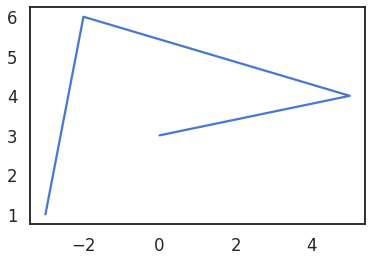

In [ ]:
# pyplot

plt.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

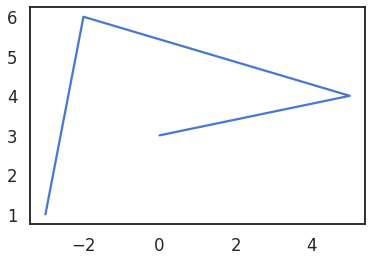

In [ ]:
# object oriented API

fig, ax = plt.subplots()
ax.plot([-3, -2, 5, 0], [1, 6, 4, 3])
plt.show()

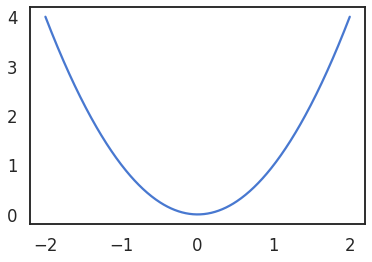

In [ ]:
# pyplot

import numpy as np
x = np.linspace(-2, 2, 500)
y = x**2

plt.plot(x, y)
plt.show()

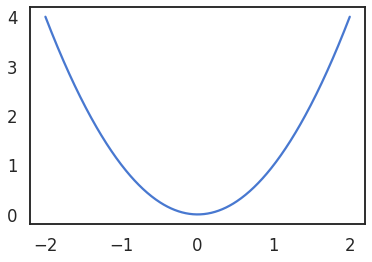

In [ ]:
# object oriented API

fig, ax = plt.subplots()

ax.plot(x, y)

plt.show()